<a href="https://colab.research.google.com/github/JohanSaenz/SeriesDeTiempoUnivariadas/blob/main/EcopetrolS.A/SeriesTiempoEcopetrol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis descriptivo series de tiempo - Ecopetrol S.A.
los datos fueron rescatados de Yahoo financiero. el registro toma desde el 3 de enero del 2017 al 30 de diciembre del 2019.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Python y R
El siguiente código es para usar simultaneamente python y R.

In [3]:
from platform import python_version
print(python_version())
import pandas as pd
import rpy2
print(rpy2.__version__)

3.7.13
3.4.5


## Importar los datos.
Se lee el archivo donde están los datos.

In [4]:
Ecopetrol = pd.read_csv('EC.csv')

Un primer vistazo a los datos

In [5]:
print('\n Shape of the data:')
print(Ecopetrol.shape)
Ecopetrol.head()


 Shape of the data:
(753, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,9.16,9.33,9.15,9.28,6.722824,1020900
1,2017-01-04,9.31,9.41,9.22,9.40,6.809756,549000
2,2017-01-05,9.44,9.64,9.44,9.56,6.925668,1154800
3,2017-01-06,9.56,9.67,9.45,9.49,6.874957,794200
4,2017-01-09,9.36,9.39,9.24,9.30,6.737313,639900


Cambiar el indice de los datos con $.index()$ y se selecionamos la variable con la que trabajaremos, en este caso $Close$, que corresponde a los datos de cierre de las acciones de Ecopetrol S.A.

In [6]:
# creadon el dataframe con la fecha y la variable de interes.
Ecopetrol['Date'] = pd.to_datetime(Ecopetrol.Date,format='%Y-%m-%d')
Ecopetrol.index = Ecopetrol['Date']

# reorganizando los datos por fecha si es necesario
Ecopetrol = Ecopetrol.sort_index(ascending=True, axis=0)
EC1 = pd.DataFrame(Ecopetrol[['Date', 'Close']])

#Poniendo los indices
EC1.index = EC1.Date
EC1.drop('Date', axis=1, inplace=True)
EC1.head()
EC1.tail()

,Close
Date,
2017-01-03,9.28
2017-01-04,9.40
2017-01-05,9.56
2017-01-06,9.49
2017-01-09,9.30


,Close
Date,
2019-12-23,20.590000
2019-12-24,20.700001
2019-12-26,20.270000
2019-12-27,20.219999
2019-12-30,20.270000


## Primer Gráfico de la serie de tiempo
Se hace un gráfico ilustrativo para ver el comportamiento de la serie, determinar caracteristicas que puedan verse a simple vista, como tendencia o estacionalidad.

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Ecopetrol S.A.: Historia del precio la acción al cierre (Close)')

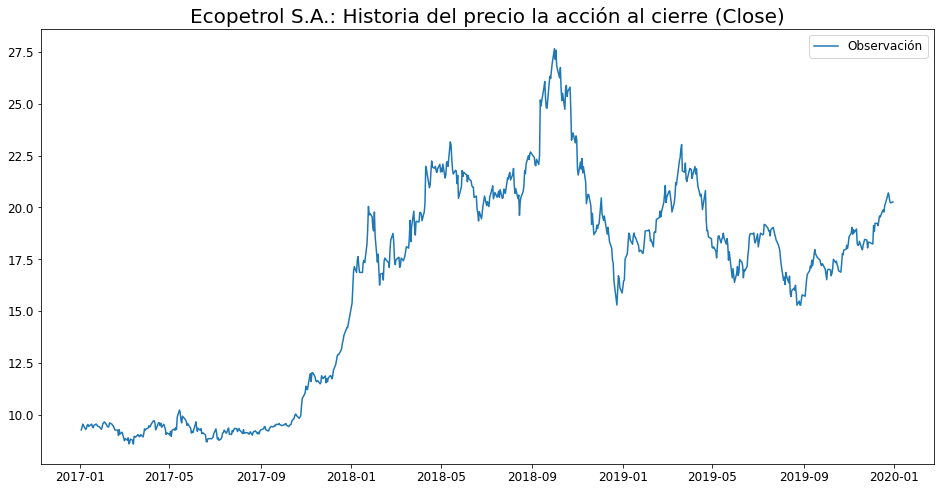

In [171]:
plt.figure(figsize=(16,8))
plt.plot(EC1, label='Observación')
plt.title("Ecopetrol S.A.: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

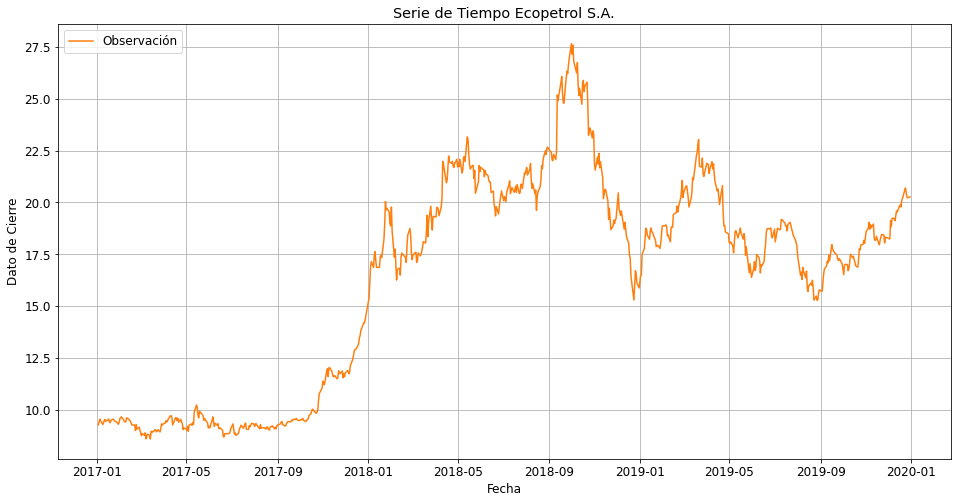

In [170]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(EC1, color='tab:orange', label='Observación')
ax.set_xlabel('Fecha')
ax.set_ylabel('Dato de Cierre')
ax.set_title('Serie de Tiempo Ecopetrol S.A.')
ax.grid(True)
ax.legend(loc='upper left');



In [169]:
type(EC1)

pandas.core.frame.DataFrame

## Análisis de tendencia

### Gráficos de autocorrelación

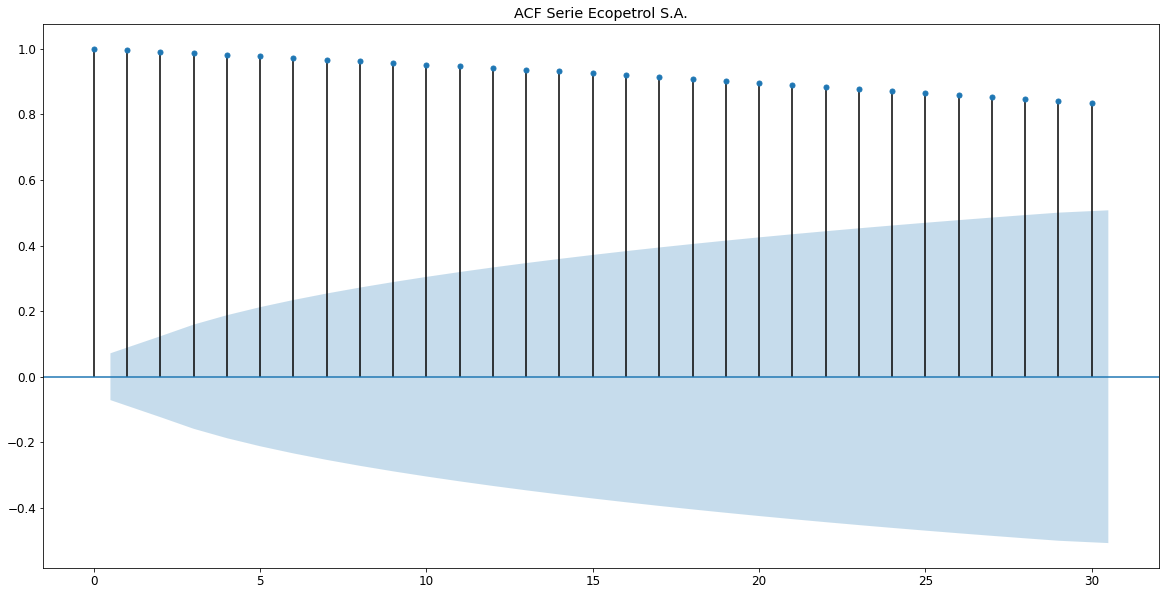

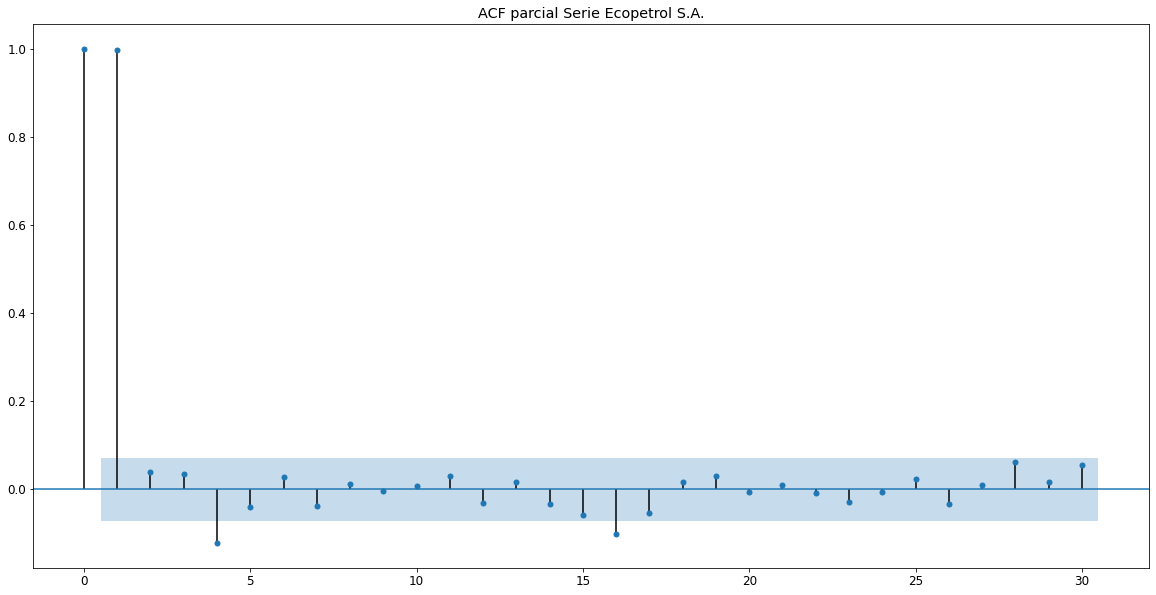

In [156]:
a=plot_acf(EC1,lags=30,title='ACF Serie Ecopetrol S.A.')
b=plot_pacf(EC1,lags=30,title='ACF parcial Serie Ecopetrol S.A.')

###Análsis de tendencia utilizando lowess


In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg
from statsmodels.nonparametric.smoothers_lowess import lowess

In [ ]:
n = EC1.shape[0]
print(n)

753


In [149]:
lowess_EC1 = lowess(EC1['Close'], np.arange(n), is_sorted=True, frac=0.05, it=0)
lowess_x = list(zip(*lowess_EC1))[0]
lowess_y = list(zip(*lowess_EC1))[1]

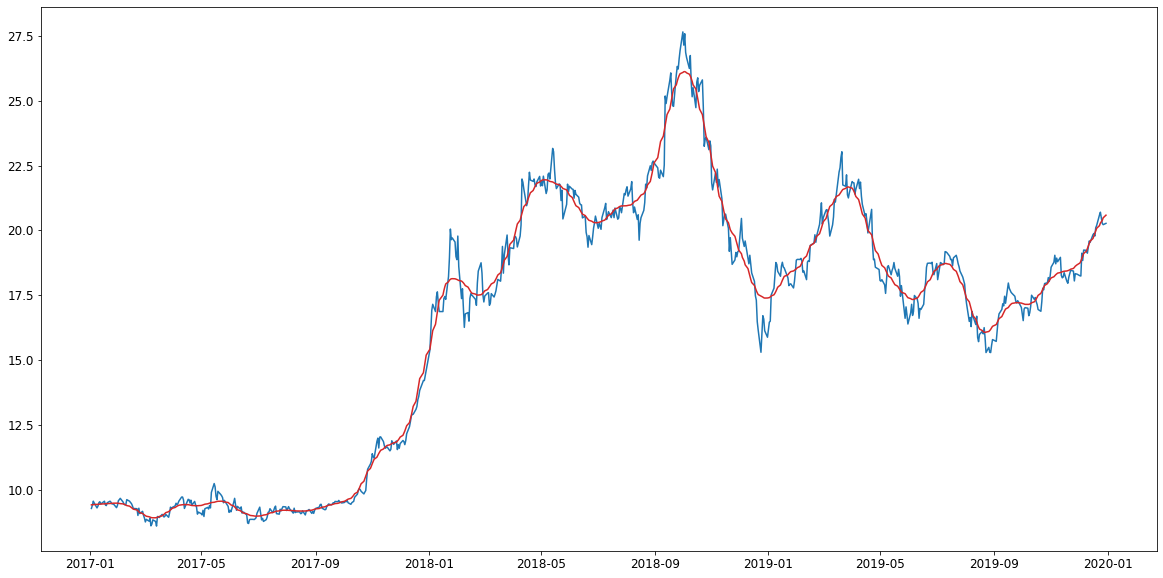

In [150]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(EC1.index, EC1['Close'], '-')
ax.plot(EC1.index, lowess_y, '-', color='tab:red')

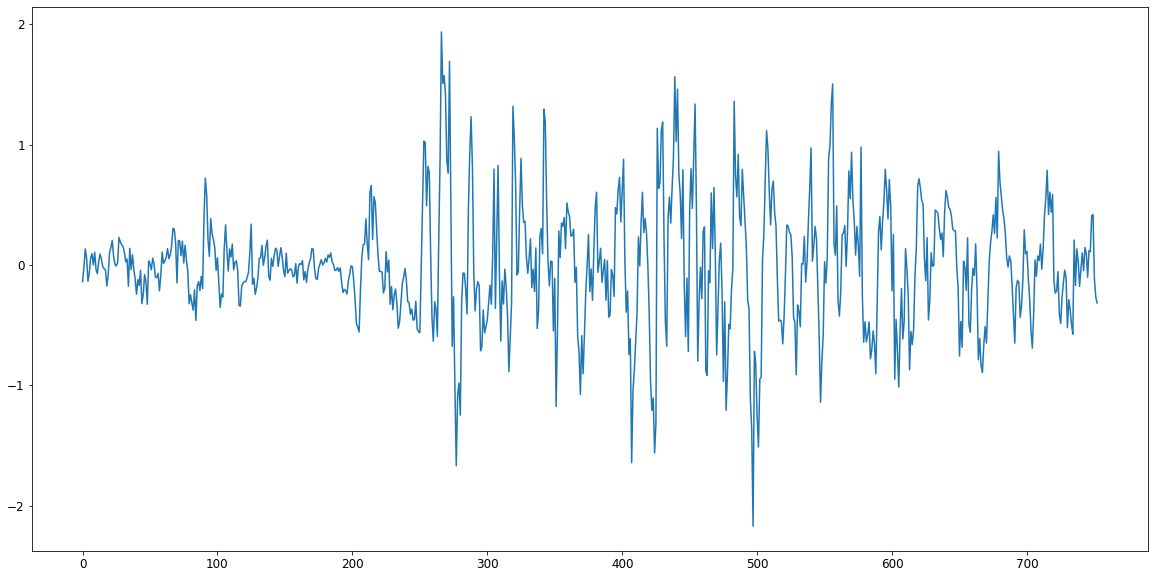

In [160]:
y=EC1.values
trend=lowess_y
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(EC1))]
# plot detrended
plt.plot(detrended)
plt.show()
EC1_detrend=pd.Series(detrended,index=EC1.index)

# Modelo utilizando redes neuronales (LSTM)

## Importando la librería.

In [13]:
import tensorflow as tf
import statsmodels.api as sm
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required libraries
from sklearn.preprocessing import MinMaxScaler

# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
print("Versión de Tensorflow: ", tf.__version__)

# optimizador
from tensorflow.keras.optimizers import Adam

Versión de Tensorflow:  2.8.0


#Hallar el número de retardos necesarios

In [15]:
pacf = sm.tsa.stattools.pacf(EC1["Close"], nlags=30)

In [17]:
T = len(EC1["Close"])

sig_test = lambda tau_h: np.abs(tau_h) > 2.58/np.sqrt(T)

## Conjunto de entrenamiento y validación.

In [28]:
len_EC1 = len(EC1)
len_train = int(len_EC1*0.8) # 80%  = 2415
len_test = len_EC1- len_train # 20% = 604
print (len_EC1, '=', len_train, '+',len_test)

753 = 602 + 151


## Gráfico de conjunto de entrenamiento y validación.

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Ecopetrol S.A.: Historia del precio la acción al cierre (Close)')

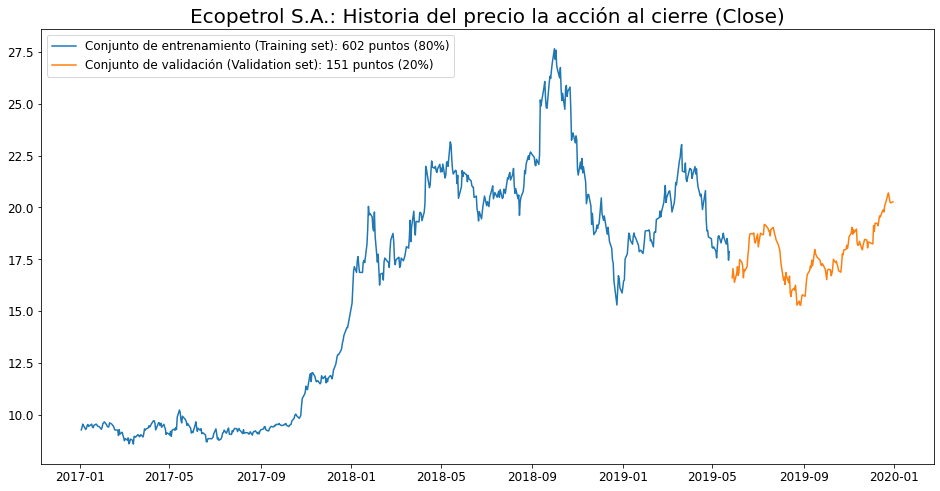

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(EC1[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (80%)'.format(len_train))
plt.plot(EC1['Close'][len_train:], label='Conjunto de validación (Validation set): {} puntos (20%)'.format(len_test)) 
plt.title("Ecopetrol S.A.: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

## Preparación de los datos

In [22]:
#creating train and test sets
dataset = EC1.values


# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = np.array(scaler.fit_transform(dataset))
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)
# dataset = pd.DataFrame(scaled_data,index=data.index, columns=['serie'])

In [23]:
dataset.shape

(753,)

In [29]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la ventana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''  
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])

    return np.array(data), np.array(labels)

Se pone una semilla aleatoria.

In [89]:
tf.random.set_seed(1234)
# hiperparámetros para crear las secuencias
past_history = 60 # tamaño secuencias de entrada
future_target = 1 # días adelante
TRAIN_SPLIT = int(len_EC1*0.8) #2415: nuḿero de datos entrenamiento

# secuencias de entrenamiento
X_train, y_train = univariate_data(dataset, 0, TRAIN_SPLIT,
                                           past_history,
                                           future_target)
#
#secuencias de validación
# No se usará ningún dato que el modelo haya visto
X_test, y_test = univariate_data(dataset, TRAIN_SPLIT, None,
                                       past_history,
                                       future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

602
(542, 60, 1)
(542,)
(90, 60, 1)
(90,)


## Modelo LSTM

In [90]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units = 50

# layers
inputs = Input(input_shape)
x = Dropout(0.2, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs)
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
x = Dropout(0.2, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 LSTM_layer (LSTM)           (None, 50)                10400     
                                                                 
 Dropout_02 (Dropout)        (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_01.compile(loss='mean_squared_error',
  optimizer=Adam(0.001))

### Se entrena al modelo.

In [92]:
#history = model_01.fit(X_train,y_train,epochs=20,batch_size=32)
history = model_01.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/20
16/16 [==============================] - 3s 61ms/step - loss: 0.0390 - val_loss: 0.0371
Epoch 2/20
16/16 [==============================] - 0s 28ms/step - loss: 0.0222 - val_loss: 0.0061
Epoch 3/20
16/16 [==============================] - 0s 29ms/step - loss: 0.0149 - val_loss: 0.0044
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.0118 - val_loss: 0.0034
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.0129 - val_loss: 0.0043
Epoch 6/20
16/16 [==============================] - 0s 29ms/step - loss: 0.0116 - val_loss: 0.0038
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.0123 - val_loss: 0.0039
Epoch 8/20
16/16 [==============================] - 0s 27ms/step - loss: 0.0099 - val_loss: 0.0029
Epoch 9/20
16/16 [==============================] - 0s 28ms/step - loss: 0.0097 - val_loss: 0.0046
Epoch 10/20
16/16 [==============================] - 0s 30ms/step - loss: 0.0083 - val_loss: 0.0031
Epoch 11/

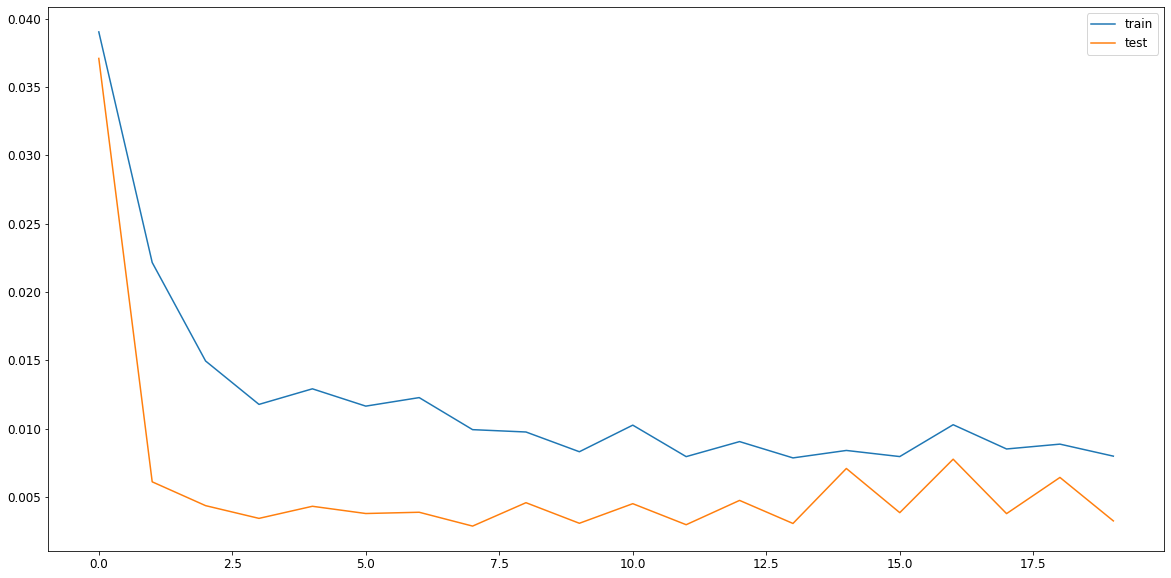

In [93]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend();

### Datos de validación.

In [94]:
X_test.shape

(90, 60, 1)

### Calcula predicciones.

In [95]:
prediction1 = model_01.predict(X_test)

In [96]:
print(prediction1.shape)
print(y_test.shape)

(90, 1)
(90,)


### Elimina dimesiones sobrantes para los gráficos.

In [97]:
y_train_p1 = y_train #np.squeeze(y_train, axis=-1)
y_test_p1 = y_test#np.squeeze(y_test, axis=-1)
y_pred_p1 = np.squeeze(prediction1, axis=-1)

In [98]:
print(y_train_p1.shape)
print(y_test_p1.shape)
print(y_pred_p1.shape)

k=0
for i,j in zip(y_test_p1, y_pred_p1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(542,)
(90,)
(90,)
0.3811023622047244 0.43690738 -0.0558050186145963
0.3511811023622047 0.4339345 -0.08275340739197623
0.36167979002624673 0.4297664 -0.0680865967211135
0.3517060367454069 0.4234818 -0.07177575546612569
0.3511811023622047 0.41847727 -0.06729616466469657
0.3658792650918635 0.41303095 -0.047151687123331176
0.3774278215223097 0.40799916 -0.03057133638326892
0.3737532808398951 0.40472215 -0.030968873300577293
0.39527553805774296 0.40296844 -0.0076928984218255225
0.4167979527559056 0.4013937 0.015404241188980539


## Gráfica de predicciones

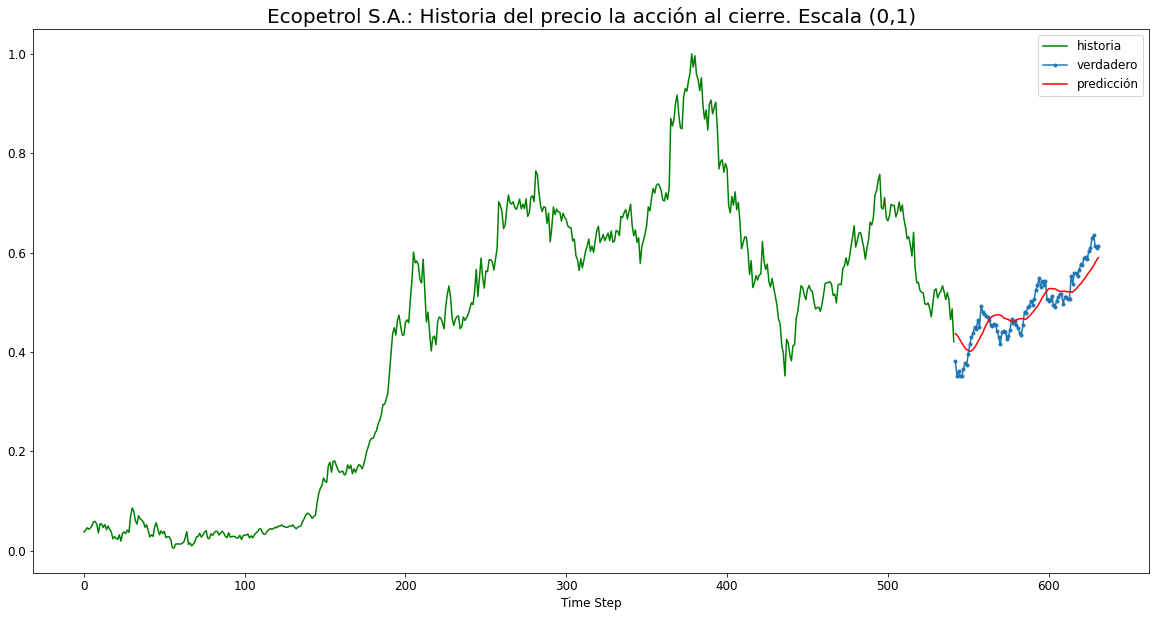

In [99]:
plt.plot(np.arange(0, len(y_train_p1)), y_train_p1, 'g', label="historia")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_test_p1, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_pred_p1, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Ecopetrol S.A.: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

## Regreso a la escala original

In [100]:
y_pred_or1 = scaler.inverse_transform(y_pred_p1.reshape(-1,1))
y_test_or1 = scaler.inverse_transform(y_test_p1.reshape(-1,1))

In [101]:
k=0
for i,j in zip(y_test_or1, y_pred_or1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[15.86] [16.923086] [-1.06308617]
[15.29] [16.866451] [-1.57645126]
[15.49] [16.78705] [-1.29705025]
[15.3] [16.667328] [-1.36732788]
[15.29] [16.571993] [-1.28199287]
[15.57] [16.46824] [-0.89824074]
[15.79] [16.372383] [-0.58238312]
[15.72] [16.309958] [-0.5899575]
[16.129999] [16.276548] [-0.14654939]
[16.540001] [16.24655] [0.29345139]


In [102]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or1-y_test_or1,2)))
print(rmsLSTM )

0.6394069785705874


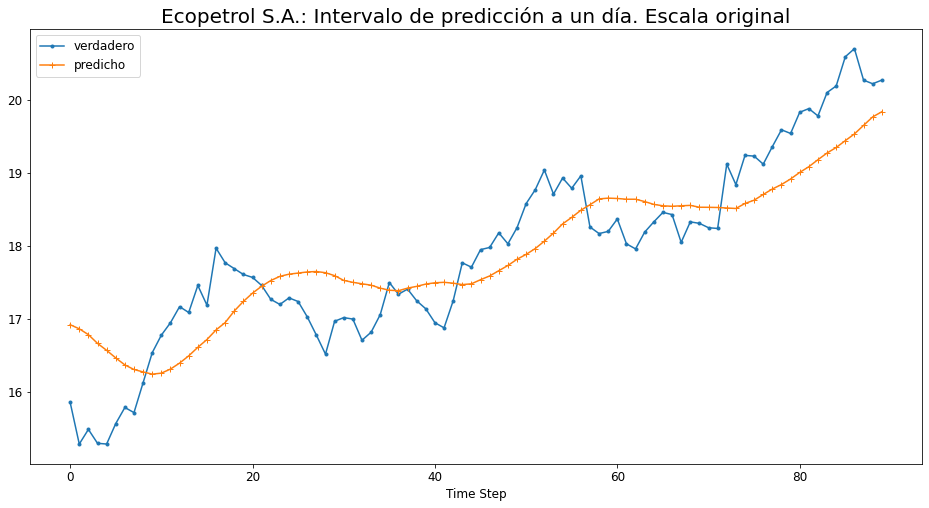

In [103]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, len(y_test_or1)), y_test_or1, marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_test_or1)), y_pred_or1, marker='+', label="predicho")
plt.xlabel('Time Step')
#plt.annotate("rms = "+str(round(rmsLSTM,2)) , xy=(40, 20), size = 15)
#plt.annotate("modelo = LSTM(50), timestep=60" , xy=(40, 19.5), size = 15)
#plt.annotate("epochs=40" , xy=(40, 19), size = 15)
plt.title("Ecopetrol S.A.: Intervalo de predicción a un día. Escala original", size = 20)
plt.legend()
plt.show();